In [1]:
import os 
print(os.getcwd())
os.environ.update(os.environ)
        # Add a new environment variable to the operating system
os.environ["RAMP_HOME"] = "/home/kshitij/hotosm/fAIr-lib-python"
# Print the environment variables to verify that the new variable was added
print(os.environ["RAMP_HOME"])

/home/kshitij/hotosm/fAIr-lib-python
/home/kshitij/hotosm/fAIr-lib-python


In [2]:
import ramp.utils
import fairlib

Segmentation Models: using `keras` framework.
/home/kshitij/hotosm/fAIr-lib-python


In [ ]:
from fairlib import preprocess

preprocess(
            input_path = "/home/kshitij/hotosm/fAIr-lib-python/ramp-data/2",
            output_path = "/home/kshitij/hotosm/fAIr-lib-python/ramp-data/output/2",
            rasterize=True,
            rasterize_options=["binary"],
            georeference_images=True,
        )

In [4]:
from fairlib import train

Writing ramp-data/TRAIN/2/2_fair_split_train.csv
Writing ramp-data/TRAIN/2/2_fair_split_val.csv


Starting to prepare data for training
/home/kshitij/hotosm/fAIr-lib-python
Data is ready for training
Loss function constructor: get_sparse_categorical_crossentropy_fn
Loss function: sparse_categorical_crossentropy
Metric constructor function: get_sparse_categorical_accuracy_fn
Accuracy metrics: ['sparse_categorical_accuracy']
Optimizer constructor: get_adam_optimizer
0.0003000000142492354
Model: importing saved model /home/kshitij/hotosm/fAIr-lib-python/ramp-code/ramp/checkpoint.tf
Compose([
  Rotate(always_apply=False, p=0.7, limit=(-90, 90), interpolation=0, border_mode=0, value=[0.0, 0.0, 0.0], mask_value=0),
  ColorJitter(always_apply=False, p=0.7, brightness=[0.8, 1.2], contrast=[0.8, 1.2], saturation=[0.8, 1.2], hue=[-0.2, 0.2]),
], p=1.0, bbox_params=None, keypoint_params=None, additional_targets={})
model checkpoint callback constructor:get_model_checkpt_callback_fn
tensorboard callback constructor: get_tb_callback_fn
prediction logging callback constructor: get_pred_logging_c

INFO:tensorflow:Assets written to: /home/kshitij/hotosm/fAIr-lib-python/ramp-data/TRAIN/2/model-checkpts/20221212-160258/model_20221212-160258_001_0.842.tf/assets


INFO:tensorflow:Assets written to: /home/kshitij/hotosm/fAIr-lib-python/ramp-data/TRAIN/2/model-checkpts/20221212-160258/model_20221212-160258_001_0.842.tf/assets


62/62 [==============================] - 104s 2s/step - loss: 0.7801 - sparse_categorical_accuracy: 0.8160 - val_loss: 0.4596 - val_sparse_categorical_accuracy: 0.8417
Epoch 2/2
62/62 [==============================] - ETA: 0s - loss: 0.3848 - sparse_categorical_accuracy: 0.8561

INFO:tensorflow:Assets written to: /home/kshitij/hotosm/fAIr-lib-python/ramp-data/TRAIN/2/model-checkpts/20221212-160258/model_20221212-160258_002_0.905.tf/assets


INFO:tensorflow:Assets written to: /home/kshitij/hotosm/fAIr-lib-python/ramp-data/TRAIN/2/model-checkpts/20221212-160258/model_20221212-160258_002_0.905.tf/assets


62/62 [==============================] - 94s 2s/step - loss: 0.3848 - sparse_categorical_accuracy: 0.8561 - val_loss: 0.2770 - val_sparse_categorical_accuracy: 0.9048
Time taken to train code : 198.48966524499883 seconds
Generating graphs
Graph generated at : ramp-data/TRAIN/2/graphs
extracting highest accuracy model
/home/kshitij/hotosm/fAIr-lib-python/ramp-data/TRAIN/2/model-checkpts/20221212-160258
model_20221212-160258_002_0.905.tf


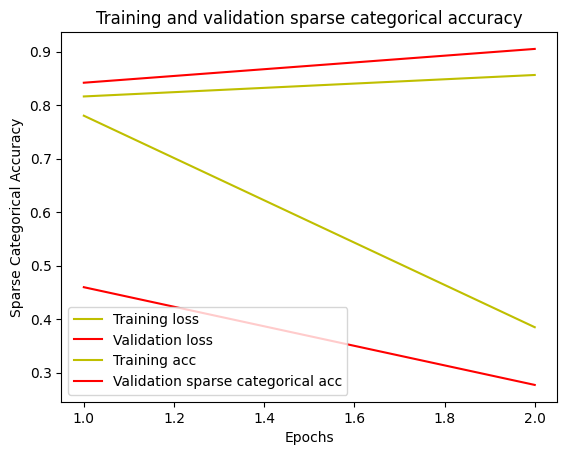

In [5]:
final_accuracy, final_model_path = train(
    input_path="/home/kshitij/hotosm/fAIr-lib-python/ramp-data/output/2",
    epoch_size=2,
    batch_size=2,
    model="ramp",
    model_home=os.environ["RAMP_HOME"],
    t_id=2,
)

In [6]:
print(final_accuracy,final_model_path)

90.5 /home/kshitij/hotosm/fAIr-lib-python/ramp-data/TRAIN/2/model-checkpts/20221212-160258/model_20221212-160258_002_0.905.tf


In [7]:
from fairlib import predict

predict(
    checkpoint_path=final_model_path,
    input_path="/home/kshitij/hotosm/fAIr-lib-python/ramp-data/input_2/",
    prediction_path="/home/kshitij/hotosm/fAIr-lib-python/ramp-data/predictions",
)

1/1 [==============================] - 1s 1s/step


Georeferencing for predictions: 100%|█████████████████████████████████████████| 2/2 [00:00<00:00, 20.23it/s]


In [9]:
from fairlib import polygonize

polygonize(
    input_path="/home/kshitij/hotosm/fAIr-lib-python/ramp-data/predictions", 
    output_path="/home/kshitij/hotosm/fAIr-lib-python/ramp-data/predictions/prediction.geojson"
)

100%|███████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 36.60mask/s]
/home/kshitij/anaconda3/lib/python3.9/site-packages/geopandas/io/file.py:362: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  pd.Int64Index,
ERROR:fiona._env:PROJ: proj_create_from_database: /home/kshitij/anaconda3/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
Merging components: 100%|████████████████████████████████████████████| 53/53 [00:03<00:00, 16.14component/s]
/home/kshitij/anaconda3/lib/python3.9/site-packages/geopandas/io/file.py:362: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  pd.Int64Index,
